In [1]:
# %load imports.txt
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../../')

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Imports and constants

In [2]:
import os

from src.data_processing.load_data import load_seeds
from src.experiments.config import get_config
from src.experiments.experiment import run
from src.settings import REPORT_DIR

PLOT_DIR = os.path.join(REPORT_DIR, 'figures')
NAME = 'seeds'
DATA_LOADER_FUNC = load_seeds

# Experiments

In [3]:
df, X, y = DATA_LOADER_FUNC(standardize=False)
config = get_config(n_neighbors=list(range(1, len(y))))
df.head()

Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811             5.554            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034             5.658            3.562   

   Asymmetry coefficient  Length of kernel groove  Wheat  
0                  2.221                    5.220      1  
1                  1.018                    4.956      1  
2                  2.699                    4.825      1  
3                  2.259                    4.805      1  
4                  1.355                    5.175      1

In [4]:
df_s, X_s, y_s = DATA_LOADER_FUNC(standardize=True)
df_s.head()

Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  0.142098   0.215462     0.000061          0.304218         0.141702   
1  0.011188   0.008224     0.428515         -0.168625         0.197432   
2 -0.192067  -0.360201     1.442383         -0.763637         0.208048   
3 -0.347091  -0.475333     1.039381         -0.688978         0.319508   
4  0.445257   0.330595     1.374509          0.066666         0.805159   

   Asymmetry coefficient  Length of kernel groove  Wheat  
0              -0.986152                -0.383577      1  
1              -1.788166                -0.922013      1  
2              -0.667479                -1.189192      1  
3              -0.960818                -1.229983      1  
4              -1.563495                -0.475356      1

In [5]:
history = run(X, y, config)

In [6]:
history_s = run(X_s, y_s, config)

In [7]:
df_history = pd.DataFrame.from_dict(history)
df_history.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           1         inf  0.893517  0.011607   
1        5           30  uniform           2           1  0.898854  0.012759   
2        5           30  uniform           1           2  0.901290  0.011036   
3        5           30  uniform           1           1  0.900091  0.011845   
4        5           30  uniform           2           2  0.897972  0.013794   

             F1  
0  89.4% ± 1.2%  
1  89.9% ± 1.3%  
2  90.1% ± 1.1%  
3  90.0% ± 1.2%  
4  89.8% ± 1.4%

In [8]:
df_history_s = pd.DataFrame.from_dict(history_s)
df_history_s.head()

N-splits RandomStates   Weight K-neighbors Minkowski-p   F1 mean    F1 std  \
0        5           30  uniform           1           1  0.917830  0.010594   
1        5           30  uniform           1           2  0.927903  0.010727   
2        5           30  uniform           2         inf  0.914653  0.010679   
3        5           30  uniform           1         inf  0.918649  0.014156   
4        5           30  uniform           2           1  0.915099  0.010197   

             F1  
0  91.8% ± 1.1%  
1  92.8% ± 1.1%  
2  91.5% ± 1.1%  
3  91.9% ± 1.4%  
4  91.5% ± 1.0%

In [9]:
df_history['Dataset'] = 'Original'
df_history_s['Dataset'] = 'Standardized'
df_results = pd.concat([df_history, df_history_s])


df_results['N-splits'] = pd.to_numeric(df_results['N-splits'])
df_results['RandomStates'] = pd.to_numeric(df_results['RandomStates'])
df_results['K-neighbors'] = pd.to_numeric(df_results['K-neighbors'])
df_results['F1 mean'] = pd.to_numeric(df_results['F1 mean'])
df_results['F1 std'] = pd.to_numeric(df_results['F1 std'])
df_results['Distance'] = df_results['Minkowski-p'].replace({'1': 'Manhattan',
                                                            '2': 'Euclidean',
                                                            'inf': 'Chebyshev'})

df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            1         inf  0.893517   
1            5            30  uniform            2           1  0.898854   
2            5            30  uniform            1           2  0.901290   
3            5            30  uniform            1           1  0.900091   
4            5            30  uniform            2           2  0.897972   
...        ...           ...      ...          ...         ...       ...   
4801         9            30    gauss          185           2  0.920717   
4802         9            30    gauss          185         inf  0.906008   
4803         9            30    gauss          186           2  0.920717   
4804         9            30    gauss          186           1  0.929113   
4805         9            30    gauss          186         inf  0.905843   

        F1 std            F1       Dataset   Distance  
0     0.011607  89.4% ± 1.2%      Original  Chebyshev  
1     0.012759  89.9% ± 1.3%      Original  Manhattan  
2     0.011036  90.1% ± 1.1%      Original  Euclidean  
3     0.011845  90.0% ± 1.2%      Original  Manhattan  
4     0.013794  89.8% ± 1.4%      Original  Euclidean  
...        ...           ...           ...        ...  
4801  0.012197  92.1% ± 1.2%  Standardized  Euclidean  
4802  0.013883  90.6% ± 1.4%  Standardized  Chebyshev  
4803  0.012197  92.1% ± 1.2%  Standardized  Euclidean  
4804  0.014327  92.9% ± 1.4%  Standardized  Manhattan  
4805  0.013889  90.6% ± 1.4%  Standardized  Chebyshev  

[9612 rows x 10 columns]

In [10]:
df_results['F1 up'] = df_results['F1 mean'] + df_results['F1 std']
df_results['F1 down'] = df_results['F1 mean'] - df_results['F1 std']
df_results

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
0            5            30  uniform            1         inf  0.893517   
1            5            30  uniform            2           1  0.898854   
2            5            30  uniform            1           2  0.901290   
3            5            30  uniform            1           1  0.900091   
4            5            30  uniform            2           2  0.897972   
...        ...           ...      ...          ...         ...       ...   
4801         9            30    gauss          185           2  0.920717   
4802         9            30    gauss          185         inf  0.906008   
4803         9            30    gauss          186           2  0.920717   
4804         9            30    gauss          186           1  0.929113   
4805         9            30    gauss          186         inf  0.905843   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
0     0.011607  89.4% ± 1.2%      Original  Chebyshev  0.905124  0.881910  
1     0.012759  89.9% ± 1.3%      Original  Manhattan  0.911614  0.886095  
2     0.011036  90.1% ± 1.1%      Original  Euclidean  0.912325  0.890254  
3     0.011845  90.0% ± 1.2%      Original  Manhattan  0.911935  0.888246  
4     0.013794  89.8% ± 1.4%      Original  Euclidean  0.911766  0.884178  
...        ...           ...           ...        ...       ...       ...  
4801  0.012197  92.1% ± 1.2%  Standardized  Euclidean  0.932914  0.908521  
4802  0.013883  90.6% ± 1.4%  Standardized  Chebyshev  0.919891  0.892124  
4803  0.012197  92.1% ± 1.2%  Standardized  Euclidean  0.932914  0.908521  
4804  0.014327  92.9% ± 1.4%  Standardized  Manhattan  0.943440  0.914786  
4805  0.013889  90.6% ± 1.4%  Standardized  Chebyshev  0.919732  0.891954  

[9612 rows x 12 columns]

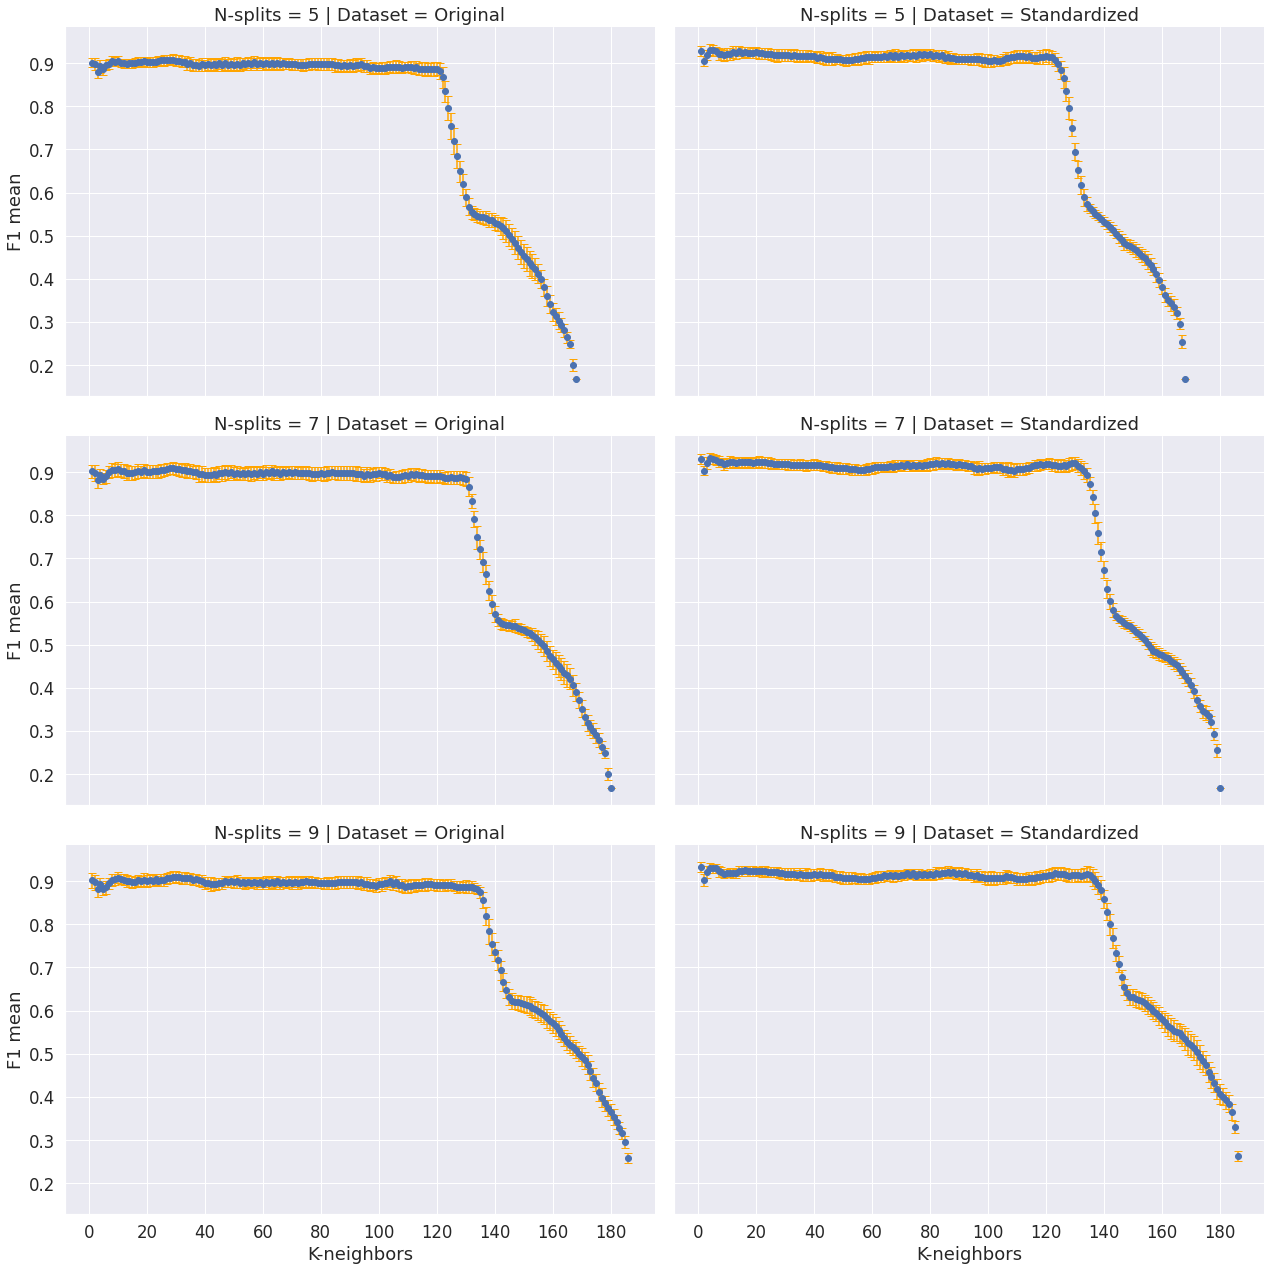

In [11]:
data = df_results[(df_results['Distance'] == 'Euclidean') 
                  & (df_results['Weight'] == 'uniform')]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data, col="Dataset", row="N-splits", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_grid.png'), bbox_inches='tight')

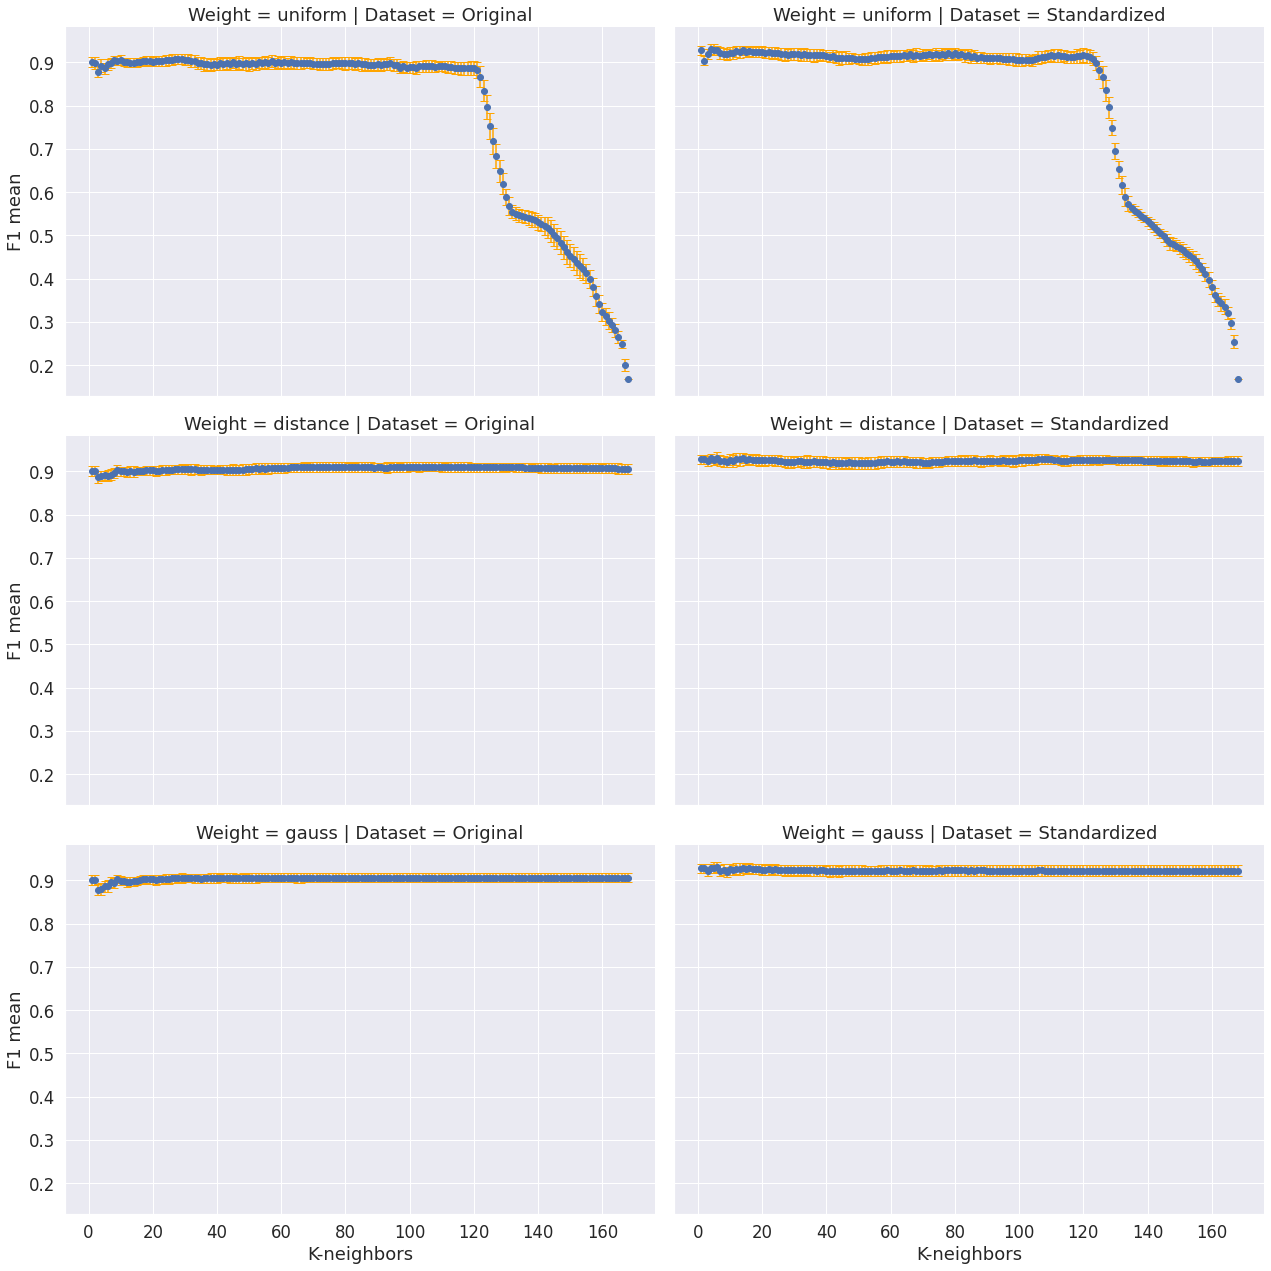

In [12]:
data_weight = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5)]

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_weight, col="Dataset", row="Weight", height=6, aspect=1.5)
g.set(xticks=np.arange(0, len(data_weight), 20))
g.map(plt.errorbar, "K-neighbors", "F1 mean", "F1 std", capsize=4, ls='none', fmt='o', ecolor='orange')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_weight_grid.png'), bbox_inches='tight')

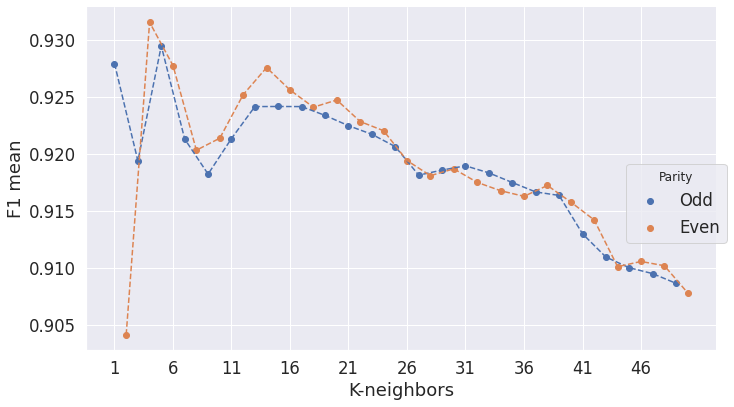

In [13]:
data_even_odd = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Standardized') 
                         & (df_results['Weight'] == 'uniform')].copy()

data_even_odd = data_even_odd[data_even_odd['K-neighbors'] < 51]

data_even_odd['Parity'] = 'None'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 0, 'Parity'] = 'Even'
data_even_odd.loc[data_even_odd['K-neighbors'] % 2 == 1, 'Parity'] = 'Odd'


sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_even_odd, hue='Parity', height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_even_odd), 5))
g.map(plt.scatter, "K-neighbors", "F1 mean").add_legend(frameon=True)
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_even_odd.png'), bbox_inches='tight')

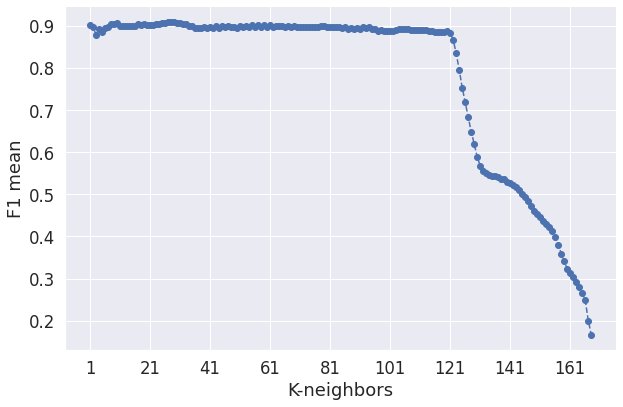

In [14]:
data_detail = df_results[(df_results['Distance'] == 'Euclidean') 
                         & (df_results['N-splits'] == 5) 
                         & (df_results['Dataset'] == 'Original') 
                         & (df_results['Weight'] == 'uniform')].copy()

sns.set(font_scale=1.5)
sns.set_style("darkgrid")
g = sns.FacetGrid(data_detail, height=6, aspect=1.5)
g.set(xticks=np.arange(1, len(data_detail), 20))
g.map(plt.scatter, "K-neighbors", "F1 mean")
g.map(plt.plot, "K-neighbors", "F1 mean", linestyle='--')

plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_detail.png'), bbox_inches='tight')

In [15]:
data_detail

N-splits  RandomStates   Weight  K-neighbors Minkowski-p   F1 mean  \
2           5            30  uniform            1           2  0.901290   
4           5            30  uniform            2           2  0.897972   
7           5            30  uniform            3           2  0.878661   
11          5            30  uniform            4           2  0.892392   
14          5            30  uniform            6           2  0.895042   
..        ...           ...      ...          ...         ...       ...   
491         5            30  uniform          164           2  0.280703   
493         5            30  uniform          165           2  0.264662   
497         5            30  uniform          166           2  0.248559   
499         5            30  uniform          167           2  0.200261   
502         5            30  uniform          168           2  0.166667   

       F1 std            F1   Dataset   Distance     F1 up   F1 down  
2    0.011036  90.1% ± 1.1%  Original  Euclidean  0.912325  0.890254  
4    0.013794  89.8% ± 1.4%  Original  Euclidean  0.911766  0.884178  
7    0.013257  87.9% ± 1.3%  Original  Euclidean  0.891918  0.865404  
11   0.014368  89.2% ± 1.4%  Original  Euclidean  0.906760  0.878025  
14   0.012022  89.5% ± 1.2%  Original  Euclidean  0.907064  0.883019  
..        ...           ...       ...        ...       ...       ...  
491  0.015290  28.1% ± 1.5%  Original  Euclidean  0.295993  0.265413  
493  0.013040  26.5% ± 1.3%  Original  Euclidean  0.277702  0.251622  
497  0.009049  24.9% ± 0.9%  Original  Euclidean  0.257607  0.239510  
499  0.013910  20.0% ± 1.4%  Original  Euclidean  0.214170  0.186351  
502  0.000000  16.7% ± 0.0%  Original  Euclidean  0.166667  0.166667  

[168 rows x 12 columns]

In [16]:
df_results[(df_results['F1 mean'] == df_results['F1 mean'].max())]

N-splits  RandomStates Weight  K-neighbors Minkowski-p   F1 mean  \
2608         7            30  gauss            6           2  0.934213   

        F1 std            F1       Dataset   Distance     F1 up   F1 down  
2608  0.011721  93.4% ± 1.2%  Standardized  Euclidean  0.945934  0.922491

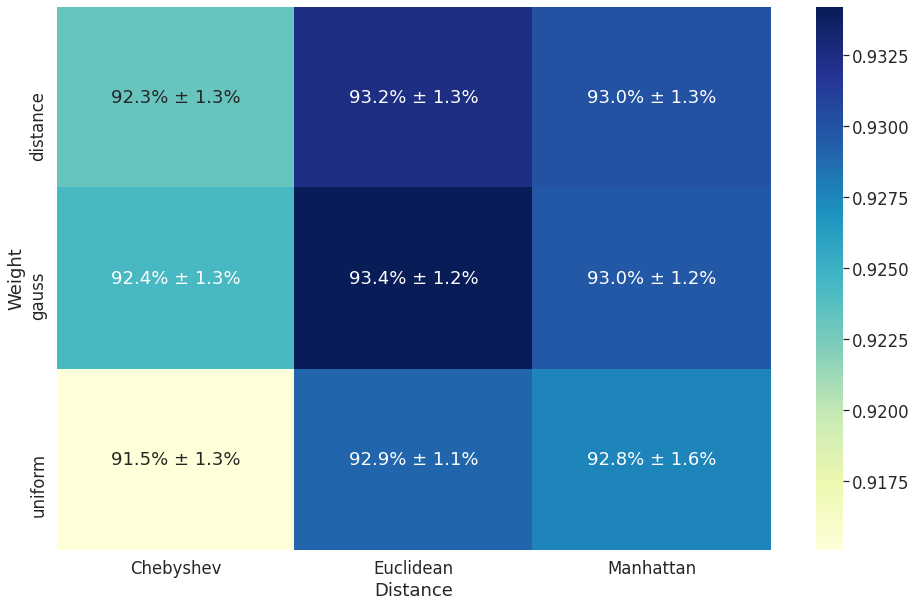

In [18]:
def plot_heatmap(df):
    temp = pd.DataFrame()
    temp['Weight'] = df['Weight']
    temp['Distance'] = df['Distance']
    temp['F1 mean'] = df['F1 mean']
    temp['Labels'] = df['F1']
    
    temp_data = temp.pivot(index='Weight', columns='Distance', values='F1 mean')
    temp_labels = temp.pivot(index='Weight', columns='Distance', values='Labels')

    plt.figure(figsize=(16, 10))
    sns.heatmap(temp_data, annot=temp_labels.to_numpy(), fmt='', cmap="YlGnBu")
    
    plt.savefig(os.path.join(PLOT_DIR, f'{NAME}_heatmap.png'))

    
heatmap_data = df_results[(df_results['K-neighbors'] == 6) 
                          & (df_results['N-splits'] == 7)
                         & (df_results['Dataset'] == 'Standardized')]
plot_heatmap(heatmap_data)